So you are minimizing the loss function  
L = F(Y_actual - Y_Predict) ; This Y_predict == you got by the linear combo of input features (or w*X)  
so what we are doing in the training process is we tend to make w higher.  
- whats the problem then  
shooting of the high param value may be due to some outliers and our model trying to fit that outliers gives us a completely different result so keeping a check over the magnitude of the param is what we call the regularization. 

so now we want to check the value of magnitude of the param.  
we do L2-reg or famously Ridge regression  
L = F(Y_actual - Y_predict) +  k * w^2   
so lets code and see the result 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [35]:
# generate linear data points x and y // generating 100 points
X = np.linspace(0, 10, 100)
error = np.random.normal(0,1 ,100) # choosing deviation from the normal distributions and adding them to the X to get the Y.
Y = X + error # labels for our 1D data

X = X.reshape((100,1))
Y  = Y.reshape((100,1))

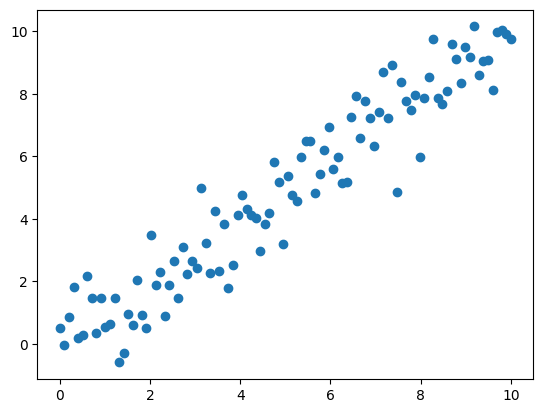

In [36]:
# Visualise the data points
plt.scatter(X , Y)

As the Loss function has cahnged there will be a change in the weight update equations lets calcualte 

L = (y - wx)^2 + k*w^2  ; k is the regularization param  
lets now calculate the dL/dw  
dL/dw = -2*x(y-wx) + 2kw  
and that's it lets write the update equations

In [37]:
# weights intialize 
w = 0 


In [38]:

Y_predict = w*X
# for the ridge regression there should be a change in the update by the gradient descent 


In [39]:
L_MSE = np.sum((Y - Y_predict)**2)  / 100
print("Loss for our data: " , L_MSE)

Loss for our data:  33.525056608312035


In [40]:
# w = w -  ( -2lx(y-wx) + 2kw)


l = 0.00001  # be very very carefull in choosing the right value it take me 1hr to figure out the bug
k = 0.001 
w  = w  + 2*l*(X.T)@(Y - Y_predict) + 2*k*w
print(w)

[[0.06619943]]


In [41]:
w = 0 
for i in range(200):
    # forward pass code:
    Y_predict = w*X 
    L_MSE = np.sum((Y - Y_predict)**2) / 100 + int(k*w**2)
    print(f"{i}th iteration : " , L_MSE)

    # Backward pass i.e Backpropagation :
    l = 0.00001 
    k =  0.0001
    w  = w  + 2*l*(X.T)@(Y - Y_predict) + 2*k*w

0th iteration :  33.525056608312035
1th iteration :  29.28950817721398
2th iteration :  25.601773521418885
3th iteration :  22.391051114614683
4th iteration :  19.595686676060957
5th iteration :  17.161991614461723
6th iteration :  15.043214079064494
7th iteration :  13.198642908582721
8th iteration :  11.592827313963983
9th iteration :  10.194897347719197
10th iteration :  8.977972142944616
11th iteration :  7.918644586278062
12th iteration :  6.996532553032039
13th iteration :  6.193888107676197
14th iteration :  5.4952571831189125
15th iteration :  4.887183219125845
16th iteration :  4.357949082230601
17th iteration :  3.8973523227658493
18th iteration :  3.4965094632156064
19th iteration :  3.147685568191888
20th iteration :  2.8441458306214917
21th iteration :  2.5800263304671875
22th iteration :  2.3502214895789315
23th iteration :  2.1502860661093384
24th iteration :  1.9763498104594148
25th iteration :  1.8250431472797897
26th iteration :  1.693432459285521
27th iteration :  1.

/tmp/ipykernel_31779/352904361.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_MSE = np.sum((Y - Y_predict)**2) / 100 + int(k*w**2)


In [42]:
# By linear algebra lets obtain the weight

In [43]:
print("The Optimum param by L2-reg : ", w)

The Optimum param by L2-reg :  [[0.99095856]]


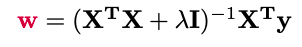

In [44]:
# above the lambda is the regularizing param or K in our case

# lets calculate the weight 
W_rs = np.linalg.inv(X.T@X  + k*np.identity(1)) @ X.T @ Y


In [45]:
W_ls = np.linalg.inv(X.T@X) @ X.T @ Y

In [46]:
print("The Optimum param by L2-reg : ", w)
print("The Optimum param by linear algebra formulae : ", W_rs)
print("The Optimum param by linear algebra formulae for linear regression: ", W_ls)

The Optimum param by L2-reg :  [[0.99095856]]
The Optimum param by linear algebra formulae :  [[0.98800157]]
The Optimum param by linear algebra formulae for linear regression:  [[0.9880016]]


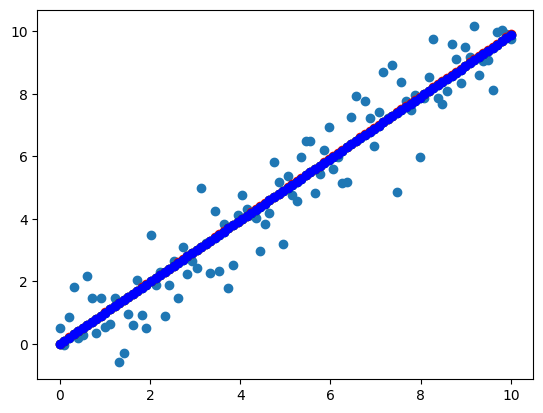

In [47]:
# Lets now visualise the ouput 

plt.scatter(X , Y)
plt.scatter(X, w*X , c = 'r')
plt.scatter(X, W_rs*X , c = 'g')
plt.scatter(X, W_ls*X , c = 'b')

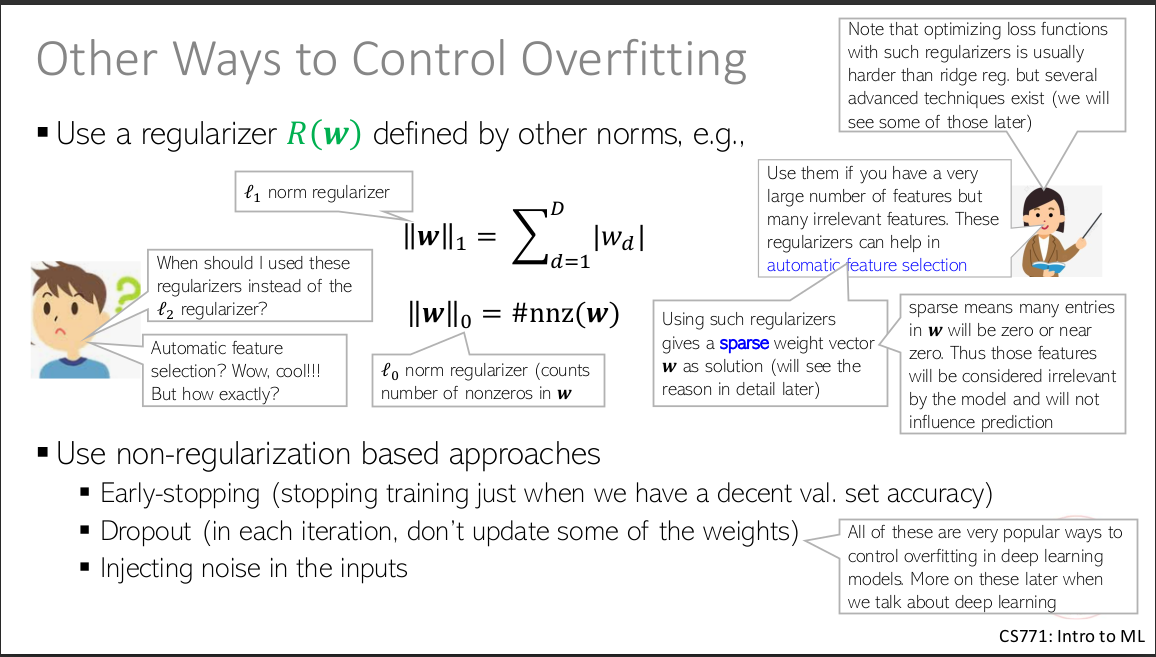

### One Attempt to implement the Lasso Regression or the L1-regularizer

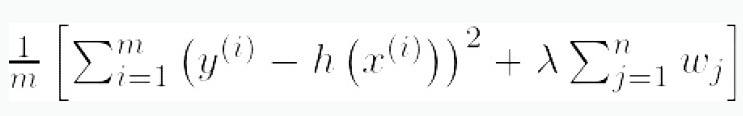

IF we tried to get the derivative of it then  
dL/dw  = -2*x*(y-y_predict) + k  

In [52]:
W_lasso = 0 
l_lasso = 0.0001
for i in range(200):
    # forward pass code:
    Y_predict = W_lasso*X 
    L_MSE = np.sum((Y - Y_predict)**2) / 100 + int(l_lasso*W_lasso)
    print(f"{i}th iteration : " , L_MSE)

    # Backward pass i.e Backpropagation :
    l = 0.00001 
    # k =  0.0001
    W_lasso  = W_lasso  + 2*l*(X.T)@(Y - Y_predict) + l_lasso

0th iteration :  33.525056608312035
1th iteration :  29.283332127345144
2th iteration :  25.591398739333624
3th iteration :  22.378021225336013
4th iteration :  19.58119241912371
5th iteration :  17.146937890193694
6th iteration :  15.02827544934325
7th iteration :  13.18430942404924
8th iteration :  11.579442248110915
9th iteration :  10.182688170844356
10th iteration :  8.967075859127124
11th iteration :  7.909128378708569
12th iteration :  6.988410532437863
13th iteration :  6.1871348311556265
14th iteration :  5.489818502961391
15th iteration :  4.882984930183764
16th iteration :  4.354903759598158
17th iteration :  3.8953646767583585
18th iteration :  3.4954804840963707
19th iteration :  3.1475156872026093
20th iteration :  2.8447372853090034
21th iteration :  2.5812848899350023
22th iteration :  2.3520576681675895
23th iteration :  2.1526159313098883
24th iteration :  1.9790954718978468
25th iteration :  1.8281329977903993
26th iteration :  1.6968012259204273
27th iteration :  1.

/tmp/ipykernel_31779/798990856.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_MSE = np.sum((Y - Y_predict)**2) / 100 + int(l_lasso*W_lasso)


In [54]:
print("The Optimum param by L1-reg : ", W_lasso)

The Optimum param by L1-reg :  [[0.98949313]]


It's derivative form can be obtained as the L1-reg tries to minimizes the  
L_MSE  + k*L1-norm(W)  
as we Know that the norm is non diffrentiable so we didn't get the closed form solution of the equations as we got in case of Ridge regression 